In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Changer le chemin pointant vers le dossier dans lequel sont chargées les données

DATA_PATH = '/home/benoit/data/projet_deep_learning_cs'

In [3]:
from helpers import loadOwid


test_length = 20
load_window = (0, 410)


pop = 60.36

In [51]:
from helpers import processData, splitTrainTest

d = loadOwid(DATA_PATH, "Italy", ['new_deaths', "icu_patients", "stringency_index", "hosp_patients"], window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_train, d_test = splitTrainTest(d, test_length)

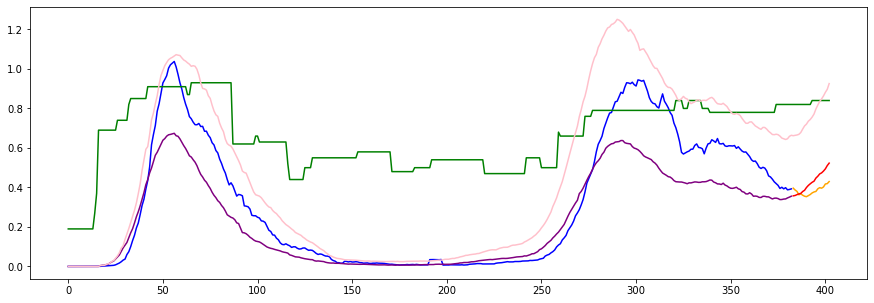

In [52]:
from matplotlib.pyplot import plot

train_length = len(d_train[list(d.keys())[0]])

train_index = [i for i in range(train_length)]
test_index = [i+train_length for i in range(test_length)]

plot(train_index, d_train['new_deaths'], color="b")
plot(test_index, d_test['new_deaths'], color ="orange")
plot(train_index, d_train['icu_patients'], color="purple")
plot(test_index, d_test['icu_patients'], color ="red")
plot(d['stringency_index'], color ="green")
plot(d['hosp_patients'], color ="pink")

In [53]:
from helpers import formatData

step = 5
# add step elements into train and test

trainX, trainY = formatData(d_train, step)
testX, testY = formatData(d_test, step)

trainX.shape

(378, 5, 4)

In [54]:
from helpers import loadModel

dim = len(d_train.keys())

model = loadModel(name="simpleRNN", dim=dim, step=step, loss="mean_squared_error")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [55]:
h = model.fit(trainX,trainY, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
378/378 [==============================] - 2s 6ms/step - loss: 0.0943
Epoch 2/200
378/378 [==============================] - 1s 1ms/step - loss: 0.0632
Epoch 3/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0595
Epoch 4/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0580
Epoch 5/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0570
Epoch 6/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0563
Epoch 7/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0556
Epoch 8/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0553
Epoch 9/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0549
Epoch 10/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0545
Epoch 11/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0542
Epoch 12/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0542
Epoch 13/200


378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 100/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 101/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 102/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 103/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 104/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 105/200
378/378 [==============================] - 1s 1ms/step - loss: 0.0524
Epoch 106/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 107/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 108/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 109/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 110/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 

378/378 [==============================] - 1s 2ms/step - loss: 0.0523
Epoch 197/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0523
Epoch 198/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0523
Epoch 199/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0523
Epoch 200/200
378/378 [==============================] - 1s 2ms/step - loss: 0.0523


In [58]:
from helpers import makeForcedPredictions, makePredictions

train_predict = makeForcedPredictions(model, d_train, step)
test_predict = makePredictions(model, trainX[-1], list(d_test.keys()), 20)
# freePredict = makePredictions(model, trainX[50], list(d_test.keys()), 1000)

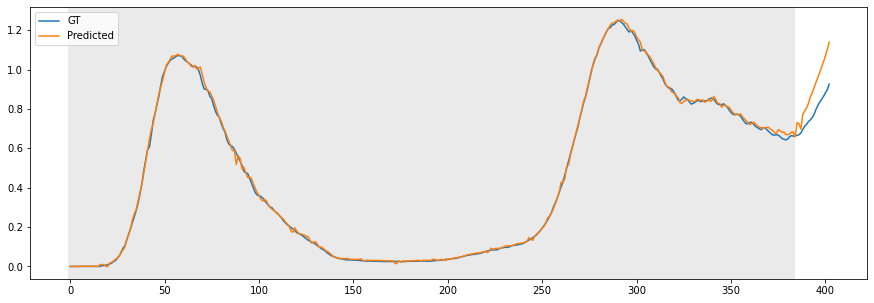

In [60]:
from matplotlib.pyplot import legend, axvspan
from numpy import concatenate
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]

dim = 'hosp_patients'

gt = concatenate([d_train[dim], d_test[dim]], axis=0)
predicted = concatenate([train_predict[dim], test_predict[dim]], axis=0)

plot(gt, label='GT')
plot(predicted, label='Predicted')
#plot(freePredict[dim], label='freePredicted')
axvspan(load_window[1]-test_length-6, -1, facecolor='0.2', alpha=0.1)
legend()

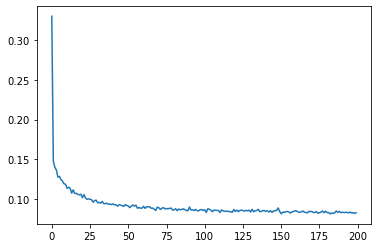

In [111]:
plot(h.history['loss'][:])

In [ ]:
from keras import losses

np.sqrt(losses.MSE(testPredict, cases_test).numpy())